In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
pd.set_option("display.max_columns", None)

In [2]:
url = 'https://raw.githubusercontent.com/HughP01/MScAI_AIDD/refs/heads/main/Data/sp100_daily_change.csv'
daily_returns = pd.read_csv(url,index_col=0,parse_dates=[0])
daily_returns.head()

,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,AVGO,AXP,BA,BAC,BK,BKNG,BLK,BMY,C,CAT,CHTR,CL,CMCSA,COF,COP,COST,CRM,CSCO,CVS,CVX,DE,DHR,DIS,DUK,EMR,FDX,GD,GE,GILD,GM,GOOG,GOOGL,GS,HD,HON,IBM,INTC,INTU,ISRG,JNJ,JPM,KO,LIN,LLY,LMT,LOW,MA,MCD,MDLZ,MDT,MET,META,MMM,MO,MRK,MS,MSFT,NEE,NFLX,NKE,NOW,NVDA,ORCL,PEP,PFE,PG,PLTR,PM,PYPL,QCOM,RTX,SBUX,SCHW,SO,SPG,T,TGT,TMO,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-01-03 00:00:00-05:00,-0.748758,0.400442,-0.300416,-2.594265,-1.427419,-0.334115,-2.352428,1.109657,-1.882910,-0.973782,-2.469183,-1.056750,-3.118045,-1.091455,-1.107295,-2.048235,-2.017983,-0.871862,1.131214,-2.873162,-1.236238,-1.028253,-0.824345,-1.052156,1.989978,-0.916002,-1.674938,0.778130,0.037107,1.906609,-1.885716,-1.695135,1.036271,0.991728,-1.251554,-1.823676,-0.796592,-1.500606,0.288336,-2.163641,0.573245,0.542819,-1.676533,-1.976360,-2.138755,-0.866870,-1.569048,-2.090225,-2.673879,0.625113,-0.435844,0.234031,-0.212420,4.305980,0.657721,-2.917906,-0.739540,-0.892115,-0.758399,0.434574,-0.341498,-0.525571,-2.009088,-0.432884,1.351127,-2.119277,-0.072793,0.682152,0.375669,-2.355704,-1.777407,-1.243562,-1.537578,0.023144,0.000000,-0.605094,-2.955367,-0.146494,-4.604618,-1.875480,0.457650,-0.469732,-2.966699,1.961914,-2.055540,-0.115936,-3.095766,-2.817243,0.105001,-4.013365,-1.488825,0.498759,-0.710673,-0.505246,-2.641765,-0.343806,0.720179,-1.317670,0.006263,0.840170
2024-01-04 00:00:00-05:00,-1.270013,0.623227,1.333086,-0.245619,-0.828974,0.029136,0.509893,0.824770,0.358658,-2.626789,-0.904053,0.764578,0.422286,0.805254,0.405416,0.312958,0.229540,0.657634,0.242360,0.633142,-2.824117,0.563261,-1.570084,-0.726761,-2.876676,0.567691,-0.238245,-0.851314,-0.457455,-1.096296,-0.244054,0.784189,-1.189315,-0.293592,0.443587,-0.948954,-0.140338,0.483662,1.197898,0.623766,-1.652906,-1.821190,0.303834,0.097564,0.180903,0.474708,-0.382561,-0.730808,0.353889,-0.211210,0.663626,-0.333554,-0.029354,-0.518049,-0.272256,-0.494648,0.238798,-0.900177,0.000000,0.877403,0.551261,0.769290,0.352535,0.289840,1.951726,0.261133,-0.717757,-0.306498,0.937780,-1.672427,-0.507921,0.901851,0.126869,-0.855739,-2.152706,0.547881,0.994406,0.251523,-0.307011,-1.039253,-0.233626,0.343244,-0.238639,-0.733668,0.121366,-0.464293,1.139394,1.614907,0.135726,-0.218077,-1.361403,0.625417,-0.264788,-0.349118,1.076023,0.631824,0.536256,1.232544,-0.966720,-0.871930
2024-01-05 00:00:00-05:00,-0.401308,0.421155,-0.162180,-0.139426,-0.432063,0.553717,1.889572,-0.056076,-0.547669,0.463442,0.025751,1.025975,1.657548,1.863901,0.730617,-0.345027,-0.396981,0.365098,1.041472,0.989162,-0.944774,-0.448081,0.961766,2.042081,0.042921,1.181480,-0.047765,0.019982,1.130287,-0.172591,0.909810,-1.001623,0.375449,0.050777,0.389070,0.619684,-0.889996,1.307545,-1.384957,1.408845,-0.470872,-0.483929,0.911349,1.284734,-0.668618,-1.056814,0.042666,0.374912,-0.238188,0.311272,0.501727,-0.150615,0.129716,0.659057,-0.299209,0.610734,-0.083371,-0.942621,-0.259290,0.76255

In [3]:
AMPLdata = {
    'Ticker': ['XOM', 'DUK', 'TMO', 'JNJ', 'MA', 'BAC', 'GOOGL', 'BLK', 'DE', 'VZ', 
               'MS', 'HD', 'COF', 'TMUS', 'HON', 'CMCSA', 'SPG', 'AMZN', 'PEP', 'PM', 
               'CL', 'MSFT', 'TXN', 'MCD', 'MMM', 'WMT', 'GE', 'GD', 'AMGN', 'ACN', 
               'ABT', 'IBM', 'SCHW', 'PFE', 'NFLX', 'LMT', 'BKNG', 'AIG', 'SBUX', 'MO', 
               'CVS', 'CRM', 'GM', 'MRK', 'TSLA', 'QCOM', 'NKE', 'USB', 'LLY', 'INTC', 
               'ABBV', 'PYPL', 'EMR', 'C', 'UNH', 'NOW', 'DIS', 'FDX', 'ORCL', 'PLTR', 
               'META', 'AMD', 'AVGO', 'ADBE', 'TGT', 'NVDA', 'BA', 'ISRG', 'CHTR', 'UPS'],
    'Weight': [0.034724, 0.034440, 0.029284, 0.028373, 0.025261, 0.023998, 0.022918, 
               0.021671, 0.021155, 0.020607, 0.019375, 0.019184, 0.019014, 0.018560, 
               0.018046, 0.017981, 0.017215, 0.016864, 0.016473, 0.015063, 0.015011, 
               0.014534, 0.013844, 0.013803, 0.013697, 0.013460, 0.013443, 0.013217, 
               0.013060, 0.012921, 0.012835, 0.012548, 0.012363, 0.012274, 0.012230, 
               0.012144, 0.012126, 0.012085, 0.011939, 0.011879, 0.011849, 0.011810, 
               0.011734, 0.011544, 0.011538, 0.011225, 0.011148, 0.010901, 0.010732, 
               0.010675, 0.010420, 0.010377, 0.010314, 0.010311, 0.010305, 0.010007, 
               0.009934, 0.009795, 0.009778, 0.009708, 0.009630, 0.009625, 0.009384, 
               0.009155, 0.008944, 0.008383, 0.008129, 0.007869, 0.007827, 0.007331]
}

df = pd.DataFrame(AMPLdata)
print(df)

   Ticker    Weight
0     XOM  0.034724
1     DUK  0.034440
2     TMO  0.029284
3     JNJ  0.028373
4      MA  0.025261
..    ...       ...
65   NVDA  0.008383
66     BA  0.008129
67   ISRG  0.007869
68   CHTR  0.007827
69    UPS  0.007331

[70 rows x 2 columns]


In [4]:
portfolio_tickers = df['Ticker'].values
portfolio_weights = df['Weight'].values
portfolio_daily_returns = daily_returns[portfolio_tickers]

#our portfolio
portfolio_returns = (portfolio_daily_returns * portfolio_weights).sum(axis=1)

#equal-weighted SP100 benchmark returns
num_stocks = len(daily_returns.columns)
equal_weight = 1 / num_stocks
benchmark_returns = daily_returns.mean(axis=1)

# 3. Create performance DataFrame
performance = pd.DataFrame({
    'Benchmark': benchmark_returns,
    'AMPL_Portfolio': portfolio_returns
}, index=daily_returns.index)
performance = performance / 100

In [5]:
performance.head()

,Benchmark,AMPL_Portfolio
Date,,
2024-01-02 00:00:00-05:00,0.000000,0.000000
2024-01-03 00:00:00-05:00,-0.008514,-0.009045
2024-01-04 00:00:00-05:00,-0.000854,-0.001142
2024-01-05 00:00:00-05:00,0.002914,0.002922
2024-01-08 00:00:00-05:00,0.010065,0.010042


PYTHON CODE

In [7]:
import pandas as pd

data = {
    'Ticker': ['AAPL', 'ABBV', 'ADBE', 'AIG', 'AMD', 'AMGN', 'AMT', 'AVGO', 'AXP', 'BAC',
               'BK', 'BMY', 'C', 'CAT', 'CHTR', 'CL', 'CMCSA', 'COF', 'COST', 'CSCO',
               'CVS', 'CVX', 'DHR', 'DIS', 'DUK', 'EMR', 'FDX', 'GD', 'GE', 'GILD',
               'GM', 'GOOGL', 'GS', 'HON', 'IBM', 'INTU', 'JPM', 'LIN', 'LMT', 'MCD',
               'MDLZ', 'MDT', 'MET', 'META', 'MRK', 'MS', 'MSFT', 'NEE', 'NKE', 'NOW',
               'NVDA', 'ORCL', 'PFE', 'PG', 'PLTR', 'PM', 'RTX', 'SBUX', 'SCHW', 'SO',
               'SPG', 'T', 'TMO', 'UNH', 'USB', 'V', 'VZ', 'WFC', 'WMT', 'XOM'],
    'Weight': [0.0251, 0.0196, 0.016, 0.0126, 0.0249, 0.0086, 0.0072, 0.0165, 0.0102, 0.006,
               0.0146, 0.0171, 0.0127, 0.0183, 0.0158, 0.0235, 0.0106, 0.0085, 0.026, 0.0152,
               0.0051, 0.0256, 0.0155, 0.0112, 0.005, 0.0224, 0.0255, 0.005, 0.0163, 0.014,
               0.019, 0.0223, 0.0129, 0.0095, 0.005, 0.0221, 0.0161, 0.0129, 0.0182, 0.0159,
               0.005, 0.0252, 0.0136, 0.0081, 0.0103, 0.0228, 0.005, 0.0188, 0.0192, 0.0181,
               0.0105, 0.0138, 0.0189, 0.0161, 0.0114, 0.005, 0.0078, 0.0146, 0.0079, 0.0186,
               0.0287, 0.0154, 0.005, 0.0088, 0.005, 0.0174, 0.005, 0.0121, 0.0184, 0.005]
}

df = pd.DataFrame(data)
print(df)

   Ticker  Weight
0    AAPL  0.0251
1    ABBV  0.0196
2    ADBE  0.0160
3     AIG  0.0126
4     AMD  0.0249
..    ...     ...
65      V  0.0174
66     VZ  0.0050
67    WFC  0.0121
68    WMT  0.0184
69    XOM  0.0050

[70 rows x 2 columns]


In [12]:
portfolio_tickers = df['Ticker'].values
portfolio_weights = df['Weight'].values
portfolio_daily_returns = daily_returns[portfolio_tickers]

#our portfolio
portfolio_returns = (portfolio_daily_returns * portfolio_weights).sum(axis=1)
portfolio_returns = portfolio_returns /100

In [13]:
performance['Python_Portfolio'] = portfolio_returns 

In [14]:
print(performance)

                           Benchmark  AMPL_Portfolio  Python_Portfolio
Date                                                                  
2024-01-02 00:00:00-05:00   0.000000        0.000000          0.000000
2024-01-03 00:00:00-05:00  -0.008514       -0.009045         -0.007619
2024-01-04 00:00:00-05:00  -0.000854       -0.001142         -0.000897
2024-01-05 00:00:00-05:00   0.002914        0.002922          0.003227
2024-01-08 00:00:00-05:00   0.010065        0.010042          0.011179
...                              ...             ...               ...
2024-12-23 00:00:00-05:00   0.004114        0.003907          0.003527
2024-12-24 00:00:00-05:00   0.009665        0.009487          0.009812
2024-12-26 00:00:00-05:00   0.001284        0.001175          0.002236
2024-12-27 00:00:00-05:00  -0.006992       -0.007164         -0.006555
2024-12-30 00:00:00-05:00  -0.011206       -0.011429         -0.011212

[251 rows x 3 columns]


In [17]:
print("Mean of each column:")
print(performance.mean(numeric_only=True))

Mean of each column:
Benchmark           0.000844
AMPL_Portfolio      0.000817
Python_Portfolio    0.000935
dtype: float64


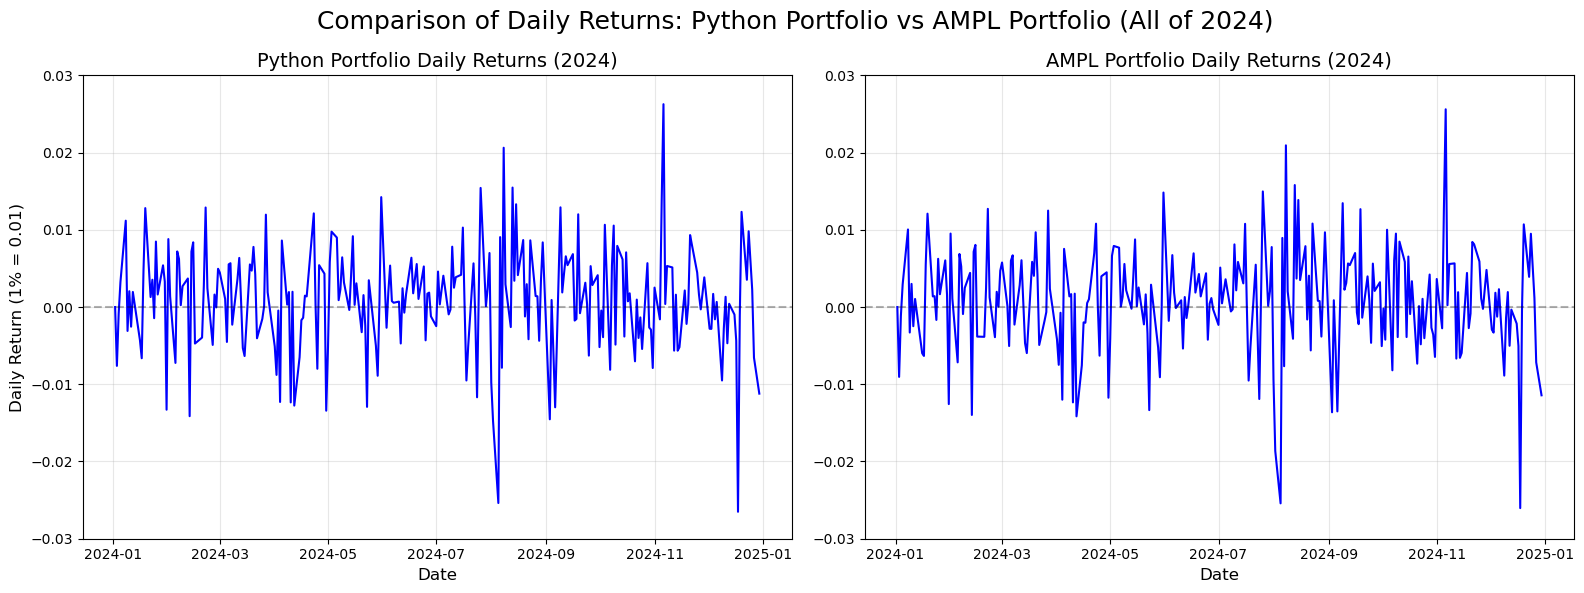

In [19]:
plt.figure(figsize=(16, 6))
plt.suptitle("Comparison of Daily Returns: Python Portfolio vs AMPL Portfolio (All of 2024)",fontsize=18)

#SP100
plt.subplot(1, 2, 1)  #pos1
sns.lineplot(data=performance, x=performance.index, y='Python_Portfolio', color='blue')
plt.axhline(0, color="black", linestyle="--", alpha=0.3)
plt.title("Python Portfolio Daily Returns (2024)", fontsize=14)
plt.ylabel("Daily Return (1% = 0.01)", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylim(-0.03,0.03)
plt.grid(True, alpha=0.3)

#OUr stocks
plt.subplot(1, 2, 2) #pos2
sns.lineplot(data=performance, x=performance.index, y='AMPL_Portfolio', color='blue')
plt.axhline(0, color="black", linestyle="--", alpha=0.3)
plt.title("AMPL Portfolio Daily Returns (2024)", fontsize=14)
#plt.ylabel("Daily Return (1% = 0.01)", fontsize=12)
plt.ylabel("")
plt.ylim(-0.03,0.03)
plt.xlabel("Date", fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

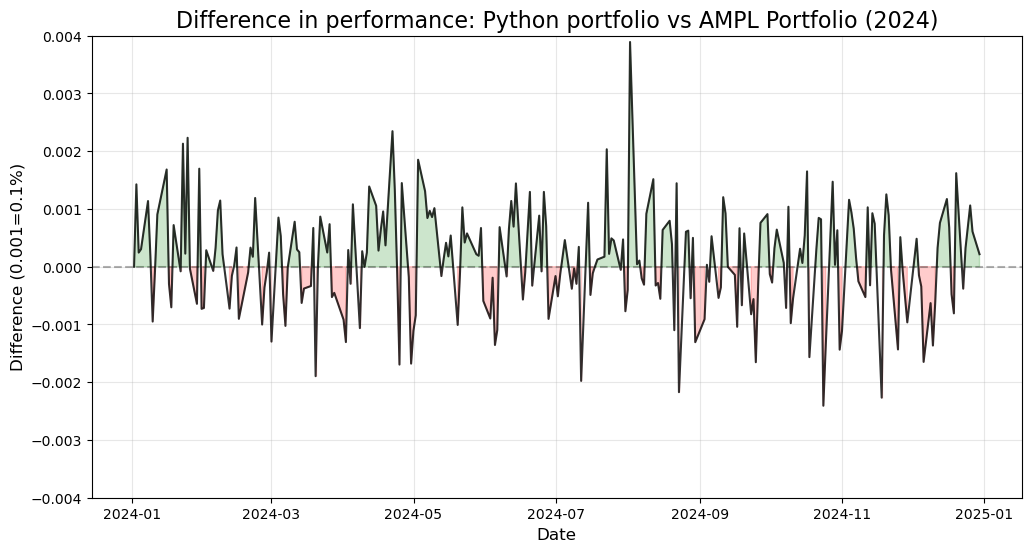

In [23]:
performance['Difference'] = performance['Python_Portfolio'] - performance['AMPL_Portfolio']

#plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=performance, x=performance.index, y='Difference', 
             color='black', alpha=0.8)
plt.axhline(0, color="black", linestyle="--", alpha=0.3)
plt.title("Difference in performance: Python portfolio vs AMPL Portfolio (2024)", fontsize=16)
plt.ylabel("Difference (0.001=0.1%)", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylim(-0.004,0.004)
plt.grid(True, alpha=0.3)

#fill positive and negatives
plt.fill_between(performance.index, performance['Difference'], 0, 
                 where=(performance['Difference'] > 0), 
                 color='green', alpha=0.2, interpolate=True)
plt.fill_between(performance.index, performance['Difference'], 0, 
                 where=(performance['Difference'] < 0), 
                 color='red', alpha=0.2)
plt.show()